In [543]:
import networkx as nx
import pandas as pd
from matplotlib import pyplot as plt

In [584]:
# data = pd.read_csv('data/export_transfer_undefined_1656060842198.csv')
# data = pd.read_csv('data/export_transfer_undefined_1656312392223.csv')
data = pd.read_csv('data/export_transfer_undefined_1656419146967.csv')

In [585]:
data

,Type,Slot,BlockTime Unix,BlockTime,Fee (SOL),Is Inner,TxHash,Source Owner Account,Source Token Account,Dest Owner Account,Dest Token Account,Amount,Symbol,Decimals,TokenAddress
0,spl-transfer,139380325,1656419009,2022-06-28T12:23:29.000Z,5000,True,4Y3UUmSn1JiUtLcerBWcCXMksb3tAXbeZ2BsBjBKzBYoPM...,4yx4W2ecWanhbKhHDybjDC6erwViWbbNRSDqjEJWcEYE,5yyhCzHYsh9oq3EF4gNWYeFkNJU8DRZk6qfFT7AkFETv,5Q544fKrFoe6tsEbD7S8EmxGTJYAKtTVhAW5Q5pge4j1,7YSGSuQFBZQh5rGoqSTwY4haLX4nvQGytutPv9owbry1,168150000000,CHICKS,9,cxxShYRVcepDudXhe7U62QHvw8uBJoKFifmzggGKVC2
1,spl-transfer,139379992,1656418801,2022-06-28T12:20:01.000Z,5000,True,3wVBYFJgR1K8hR2e53sengRPYhLhRHmRxfEPuSEakTH8Ma...,CCFQq1Z4Wyda3qAw58NjippKbJU6GgP4fY1FT5BBBdBF,8Xgp3bLeT1xu9z9CtoXu4JNBfNhuNDgvkHi4i5huaUkC,843zyyszkZgsM5f1JVvUNxmtWQYCkCVzVRTQRgM2aBVD,CAnwrjz7FRBLBkXw82Vt1VHycnawJ9K37bMz8h6nu8aH,32467076723,CHICKS,9,cxxShYRVcepDudXhe7U62QHvw8uBJoKFifmzggGKVC2
2,spl-transfer,139379976,1656418791,2022-06-28T12:19:51.000Z,5000,True,56n8hm22ataVGpn9ZLwP7Yh8yxo6NKGqJRmQ2AShuhWxtd...,843zyyszkZgsM5f1JVvUNxmtWQYCkCVzVRTQRgM2aBVD,CAnwrjz7FRBLBkXw82Vt1VHycnawJ9K37bMz8h6nu8aH,5Q544fKrFoe6tsEbD7S8EmxGTJYAKtTVhAW5Q5pge4j1,7YSGSuQFBZQh5rGoqSTwY4haLX4nvQGytutPv9owbry1,268287648800,CHICKS,9,cxxShYRVcepDudXhe7U62QHvw8uBJoKFifmzggGKVC2
3,spl-transfer,139379962,1656418781,2022-06-28T12:19:41.000Z,5000,True,3HcvZzoS6opNjMAtgKrJQJ4FUhvzA7Fm23FMABZqjPoxP4...,843zyyszkZgsM5f1JVvUNxmtWQYCkCVzVRTQRgM2aBVD,CAnwrjz7FRBLBkXw82Vt1VHycnawJ9K37bMz8h6nu8aH,3HixSznhPFXA8ueB2sy9iVmVCZP7McRSR4wUuCVeHfh4,F4UVHxYw9DGXHqa7mfwrDAT6MdC6fTLoQjZwb6ipvUhc,22583135420,CHICKS,9,cxxShYRVcepDudXhe7U62QHvw8uBJoKFifmzggGKVC2
4,spl-transfer,139379962,1656418781,2022-06-28T12:19:41.000Z,5000,True,3HcvZzoS6opNjMAtgKrJQJ4FUhvzA7Fm23FMABZqjPoxP4...,843zyyszkZgsM5f1JVvUNxmtWQYCkCVzVRTQRgM2aBVD,CAnwrjz7FRBLBkXw82Vt1VHycnawJ9K37bMz8h6nu8aH,5Q544fKrFoe6tsEbD7S8EmxGTJYAKtTVhAW5Q5pge4j1,7YSGSuQFBZQh5rGoqSTwY4haLX4nvQGytutPv9owbry1,270997625049,CHICKS,9,cxxShYRVcepDudXhe7U62QHvw8uBJoKFifmzggGKVC2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,spl-transfer,138826204,1656073512,2022-06-24T12:25:12.000Z,5000,NaN,4Dbz5fSWCJj8bJELSg8G3Zm8AqjC5fmsrH8LCrNZ9qyKPH...,B9W1EGbbHKfYpdfkHHCykAdAXCBZHLfc8xSVQaS74fq6,GbNKUCkE6HA8pczm8XucQm1ypiSHUkdvwf87nJGRzz8Q,j2xMsAGZgaWuuMwprdxs6FHs9Rk9mqLo83rf2uAEWUu,2xEnMEhYSZLLTkoBnK3SR4o5XMav9EMxngU56hVht2Kv,3375000000000,CHICKS,9,cxxShYRVcepDudXhe7U62QHvw8uBJoKFifmzggGKVC2
4996,spl-transfer,138826179,1656073493,2022-06-24T12:24:53.000Z,5000,NaN,3Mbk6qBHbUNEaJtod1u2Bg8x5u5ryzbo9hXkh7jLwiwb9E...,B9W1EGbbHKfYpdfkHHCykAdAXCBZHLfc8xSVQaS74fq6,GbNKUCkE6HA8pczm8XucQm1ypiSHUkdvwf87nJGRzz8Q,6YFuYwZCXtirf48VGiph5j85mgBiN5uvNVH99aUXTdc1,4xk3zfDhjLebqLpzUQgCsyaZYE8nJBYM7p3RkbZ5qXEk,750000000000,CHICKS,9,cxxShYRVcepDudXhe7U62QHvw8uBJoKFifmzggGKVC2
4997,spl-transfer,138826153,1656073473,2022-06-24T12:24:33.000Z,5000,NaN,4rEe8FbEMQAeQS96qtSa8qrEPQnzQaXpK8n87RvmKgVoxu...,B9W1EGbbHKfYpdfkHHCykAdAXCBZHLfc8xSVQaS74fq6,GbNKUCkE6HA8pczm8XucQm1ypiSHUkdvwf87nJGRzz8Q,AK5n2eSW3UHHNwfsBDc4V5konVNAZzEYPQiy2x92DRs3,BhYGyV3a12jrAvYE9bEeXkH4MeY6EipVJD5BZnychuAM,1500000000000,CHICKS,9,cxxShYRVcepDudXhe7U62QHvw8uBJoKFifmzggGKVC2
4998,spl-transfer,138826121,1656073453,2022-06-24T12:24:13.000Z,5000,NaN,4rE7yLHNHtZCgrXTX3CsaN4pWAxi7Rmm1wcQWa6nz5yHKd...,B9W1EGbbHKfYpdfkHHCykAdAXCBZHLfc8xSVQaS74fq6,GbNKUCkE6HA8pczm8XucQm1ypiSHUkdvwf87nJGRzz8Q,CFxJvFCKPygjY2gAVAm6TBwh2C97c9CS6CLaV3PtXUvk,BozsBXwRADQTkKwuCJfyzanf8ZzXXQ2srbj5AdbboqwJ,750000000000,CHICKS,9,cxxShYRVcepDudXhe7U62QHvw8uBJoKFifmzggGKVC2


In [586]:
for item in data.columns.tolist():
    data.rename(columns = {item : item.lstrip()}, inplace = True)

In [587]:
g1 = nx.Graph()

In [588]:
node_list = data['Source Owner Account'].tolist() + data['Dest Owner Account'].tolist()
node_list = set(node_list)
node_list = list(node_list)

In [589]:
node_list = node_list[1:]

In [590]:
g1.add_nodes_from(node_list)

In [591]:
edge_list = []

In [592]:
edge_df = data[['Source Owner Account', 'Dest Owner Account']]

In [593]:
for i in range(len(edge_df)):
    node_1 = edge_df.loc[i, ['Source Owner Account']].values[0]
    node_2 = edge_df.loc[i, ['Dest Owner Account']].values[0]
    if node_1 != node_2:
        edge_list.append((node_1, node_2))

In [594]:
g1.add_edges_from(edge_list)

In [595]:
remove1 = [node for node, degree in dict(g1.degree()).items() if degree == 0]

In [596]:
g1.remove_nodes_from(remove1)

In [597]:
remove2 = [node for node, degree in dict(g1.degree()).items() if degree == 1]

In [598]:
g1.remove_nodes_from(remove2)

In [599]:
remove1 = [node for node, degree in dict(g1.degree()).items() if degree == 0]

In [600]:
g1.remove_nodes_from(remove1)

AttributeError: 'dict_keys' object has no attribute 'index'

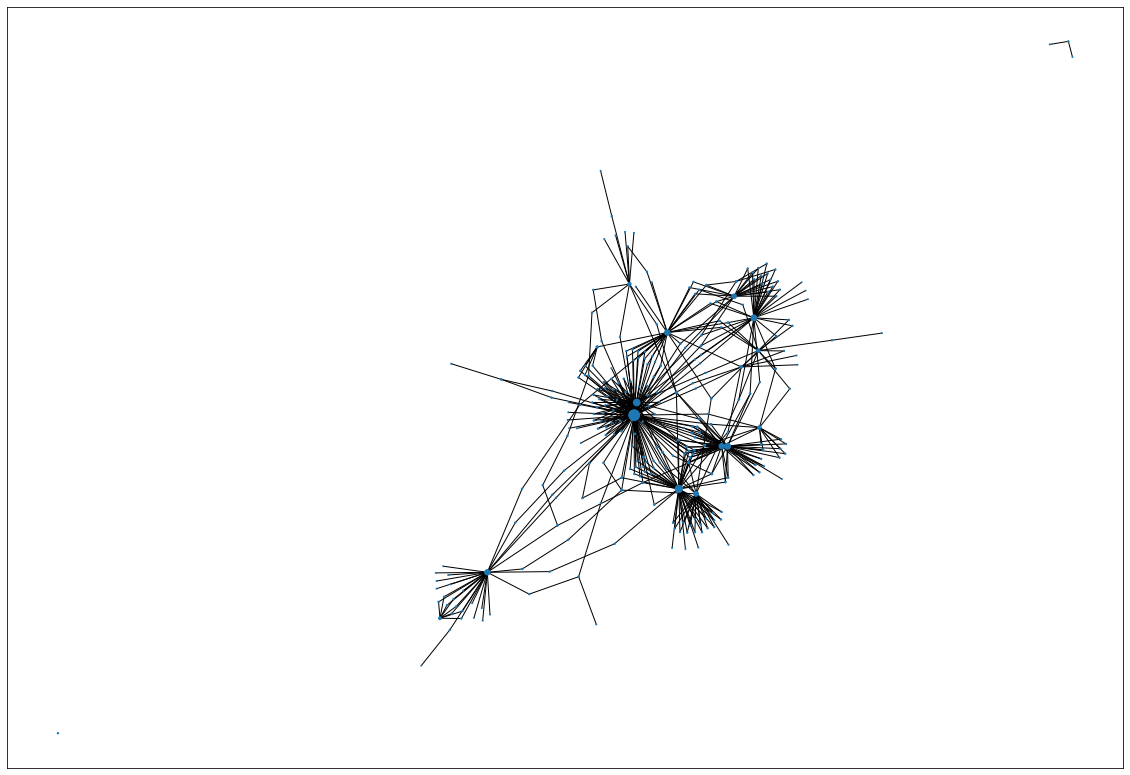

In [601]:
fig, ax = plt.subplots(figsize = (20, 14))

d = dict(g1.degree)
nx.draw(g1, nodelist = d.keys(), node_size = [v * 1 for v in d.values()], with_labels = True)
# nx.draw(g1, node_size = 40)